In [1]:
import graphvizDrawTree as gvz

# SPLAY TREE

In [118]:
class ArbreBinaire:
    def __init__(self, cle, gauche=None, droite=None):
        self.cle = cle
        self.gauche = gauche
        self.droite = droite

class ArbreSplay:
    def __init__(self):
        self.racine = None
    def _duplique(self,noeud) -> 'ArbreSplay':
        '''ArbreSplay * ArbreBinaire-> ArbreSplay'''
        '''Crée une copie de l'arbre Splay.'''
        if noeud is None:
            return None
        else:
            return ArbreBinaire(noeud.cle, self._duplique(noeud.gauche), self._duplique(noeud.droite))
    #AJOUT
    def ajout_liste(self, cles : list) -> 'ArbreSplay':
        '''ArbreSplay * int list -> ArbreSplay'''
        '''Ajoute une liste de clés dans l'arbre splay.'''
        splay = self
        for cle in cles:
            splay = splay.ajout(cle)
        return splay

    def ajout(self, cle : int) -> 'ArbreSplay':
        '''ArbreSplay * int -> ArbreSplay'''
        '''Ajoute une clé dans l'arbre splay.'''
        splay = ArbreSplay()
        splay.racine = self._duplique(self.racine)
        splay.racine = splay._ajout(splay.racine, cle)
        return splay
        
    def _ajout(self, noeud : ArbreBinaire, cle : int) -> 'ArbreBinaire':
        '''ArbreSplay * ArbreBinaire * int -> ArbreBinaire'''
        '''Ajoute une clé dans l'arbre binaire de recherche et renvoie l'arbre résultant.'''
        if noeud is None:
            return ArbreBinaire(cle)
        elif cle == noeud.cle:
            return noeud
        elif cle < noeud.cle:
            nouveauGauche = self._ajout(noeud.gauche, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, nouveauGauche, noeud.droite)
        else:
            nouveauDroite = self._ajout(noeud.droite, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, noeud.gauche, nouveauDroite)
        return self._splay(nouveauNoeud, cle)
    #SUPPRESSION
    def supprime(self, cle : int) -> 'ArbreSplay':
        '''ArbreSplay * int -> ArbreSplay'''
        '''Supprime une clé de l'arbre splay.'''
        splay = ArbreSplay()
        splay.racine = self._duplique(self.racine)
        splay.racine = splay._supprime(splay.racine, cle)
        return splay
        
    def _supprime(self, noeud : ArbreBinaire, cle : int) -> 'ArbreBinaire':
        '''ArbreSplay * ArbreBinaire * int -> ArbreBinaire'''
        '''Supprime une clé de l'arbre binaire de recherche et renvoie l'arbre résultant.'''
        if noeud is None:
            return noeud
        elif cle < noeud.cle:
            nouveauGauche = self._supprime(noeud.gauche, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, nouveauGauche, noeud.droite)
        elif cle > noeud.cle:
            nouveauDroite = self._supprime(noeud.droite, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, noeud.gauche, nouveauDroite)
        else:
            if noeud.gauche is None:
                return noeud.droite
            elif noeud.droite is None:
                return noeud.gauche
            
            min_noeud = self._min_noeud(noeud.droite)
            nouveauNoeud = ArbreBinaire(min_noeud.cle, noeud.gauche, self._supprime(noeud.droite, min_noeud.cle))
        return nouveauNoeud
    
    #RECHERCHE
    def recherche(self, cle : int) -> (bool, 'ArbreSplay'):
        '''ArbreSplay * int -> bool * ArbreSplay'''
        '''Recherche une clé dans l'arbre splay et renvoie un booléen indiquant si la clé est présente et l'arbre résultant.'''
        splay = ArbreSplay()
        splay.racine = self._duplique(self.racine)
        splay.racine = splay._splay(splay.racine, cle)
        exist = splay.racine is not None and splay.racine.cle == cle
        return exist, splay


    #     return noeud  # Si aucune rotation n'est effectuée
    def _recherche(self, noeud : ArbreBinaire, cle : int) -> 'ArbreBinaire':
        '''ArbreSplay * ArbreBinaire * int -> ArbreBinaire'''
        '''Recherche une clé dans l'arbre binaire de recherche et renvoie le noeud contenant la clé ou le noeud parent si la clé n'est pas présente.'''
        
        # #créer une copy de l'arbre
        # cle = noeud.cle
        # gauche = noeud.gauche
        # droite = noeud.droite
        
        # nouveauNoeud = ArbreBinaire(cle, gauche, droite)
        return self._splay(noeud, cle)
    
    def _splay(self, noeud : ArbreBinaire, cle : int) -> 'ArbreBinaire':
        '''ArbreSplay * ArbreBinaire * int -> ArbreBinaire'''
        '''Recherche une clé dans l'arbre binaire de recherche et renvoie le noeud contenant la clé ou le noeud parent si la clé n'est pas présente.'''
        
        if noeud is None or cle == noeud.cle:
            return noeud
        
        if cle < noeud.cle:
            if noeud.gauche is not None:
                if cle < noeud.gauche.cle:
                    noeud.gauche.gauche = self._recherche(noeud.gauche.gauche, cle)
                    noeud = self._rotation_droite(noeud)
                elif cle > noeud.gauche.cle:
                    noeud.gauche.droite = self._recherche(noeud.gauche.droite, cle)
                    if noeud.gauche.droite is not None:
                        noeud.gauche = self._rotation_gauche(noeud.gauche)
                if noeud.gauche is not None:
                    return self._rotation_droite(noeud)
            else:
                return noeud
        else:
            if noeud.droite is not None:
                if cle < noeud.droite.cle:
                    noeud.droite.gauche = self._recherche(noeud.droite.gauche, cle)
                    if noeud.droite.gauche is not None:
                        noeud.droite = self._rotation_droite(noeud.droite)
                elif cle > noeud.droite.cle:
                    noeud.droite.droite = self._recherche(noeud.droite.droite, cle)
                    noeud = self._rotation_gauche(noeud)
                if noeud.droite is not None:
                    return self._rotation_gauche(noeud)
            else:
                return noeud        
    #FONCTIONS UTILES / PRIMITIVES
    # def _splay(self, noeud : ArbreBinaire, cle : int) -> 'ArbreBinaire':
    #     '''ArbreSplay * ArbreBinaire * int -> ArbreBinaire'''
    #     '''Effectue une opération de splay sur l'arbre binaire de recherche (remonte le noeud à la racine) et renvoie l'arbre résultant.'''
    #     if noeud is None or noeud.cle == cle:
    #         return noeud
    #     elif cle < noeud.cle:
    #         if noeud.gauche is None:
    #             return noeud
    #         if cle < noeud.gauche.cle:
    #             noeud.gauche.gauche = self._splay(noeud.gauche.gauche, cle)
    #             noeud = self._rotation_droite(noeud)
    #         elif cle > noeud.gauche.cle:
    #             noeud.gauche.droite = self._splay(noeud.gauche.droite, cle)
    #             if noeud.gauche.droite is not None:
    #                 noeud.gauche = self._rotation_gauche(noeud.gauche)
    #         if noeud.gauche is not None:
    #             return self._rotation_droite(noeud)
    #         else:
    #             return noeud
    #     else:
    #         if noeud.droite is None:
    #             return noeud
    #         if cle < noeud.droite.cle:
    #             noeud.droite.gauche = self._splay(noeud.droite.gauche, cle)
    #             if noeud.droite.gauche is not None:
    #                 noeud.droite = self._rotation_droite(noeud.droite)
    #         elif cle > noeud.droite.cle:
    #             noeud.droite.droite = self._splay(noeud.droite.droite, cle)
    #             noeud = self._rotation_gauche(noeud)
    #         if noeud.droite is not None:
    #             return self._rotation_gauche(noeud)
    #         else:
    #             return noeud

    def _rotation_gauche(self, noeud : ArbreBinaire) -> 'ArbreBinaire':
        '''ArbreBinaire -> ArbreBinaire'''
        '''Effectue une rotation gauche sur l'arbre binaire de recherche et renvoie l'arbre résultant.'''
        y = noeud.droite
        noeud.droite = y.gauche
        y.gauche = noeud
        return y

    def _rotation_droite(self, noeud : ArbreBinaire) -> 'ArbreBinaire':
        '''ArbreBinaire -> ArbreBinaire'''
        '''Effectue une rotation droite sur l'arbre binaire de recherche et renvoie l'arbre résultant.'''
        x = noeud.gauche
        noeud.gauche = x.droite
        x.droite = noeud
        return x

    def _min_noeud(self, noeud : ArbreBinaire) -> 'ArbreBinaire':
        '''ArbreBinaire -> ArbreBinaire'''
        '''Renvoie le noeud contenant la clé minimale de l'arbre binaire de recherche.'''
        if noeud is None or noeud.gauche is None:
            return noeud
        return self._min_noeud(noeud.gauche)
    
    def visualiser_arbre(self):
        '''ArbreSplay -> dot'''
        '''Affiche l'arbre binaire'''
        return gvz.graph_arbre_binaire(self.racine)

## Tests

In [119]:
import graphvizDrawTree as viz

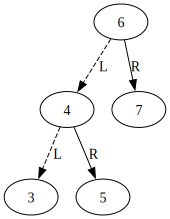

In [146]:
# Create an instance of ArbreSplay
splay_tree = ArbreSplay()

# ajout noeuds into the Splay tree
splay_tree = splay_tree.ajout_liste([3,5,4,7,6])
dot = splay_tree.visualiser_arbre()
dot


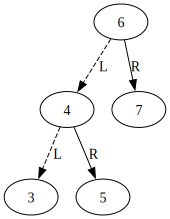

In [147]:
cleExist,splay_tree_modif = splay_tree.recherche(7)
dot = splay_tree.visualiser_arbre() # non modifié normalement
dot

In [148]:
cleExist

True

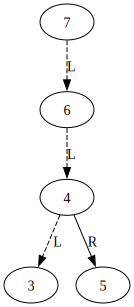

In [149]:
dot = splay_tree_modif.visualiser_arbre() # non modifié normalement
dot

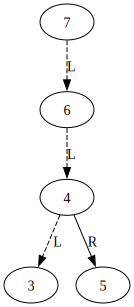

In [150]:
splay_tree_modif2 = splay_tree_modif.ajout(50)
dot = splay_tree_modif.visualiser_arbre()
dot

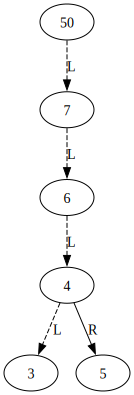

In [151]:
dot = splay_tree_modif2.visualiser_arbre()
dot

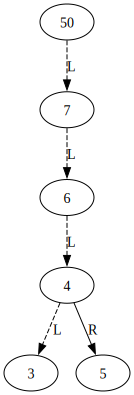

In [152]:
splay_tree_modif3 = splay_tree_modif2.supprime(7)
dot = splay_tree_modif2.visualiser_arbre()
dot

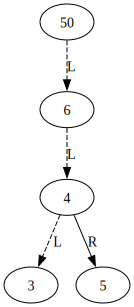

In [153]:
dot = splay_tree_modif3.visualiser_arbre() # non modifié normalement
dot